In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from keras import layers
from tensorflow import data as tf_data

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling3D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

2024-03-11 14:38:36.760726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 14:38:36.760886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 14:38:36.932214: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

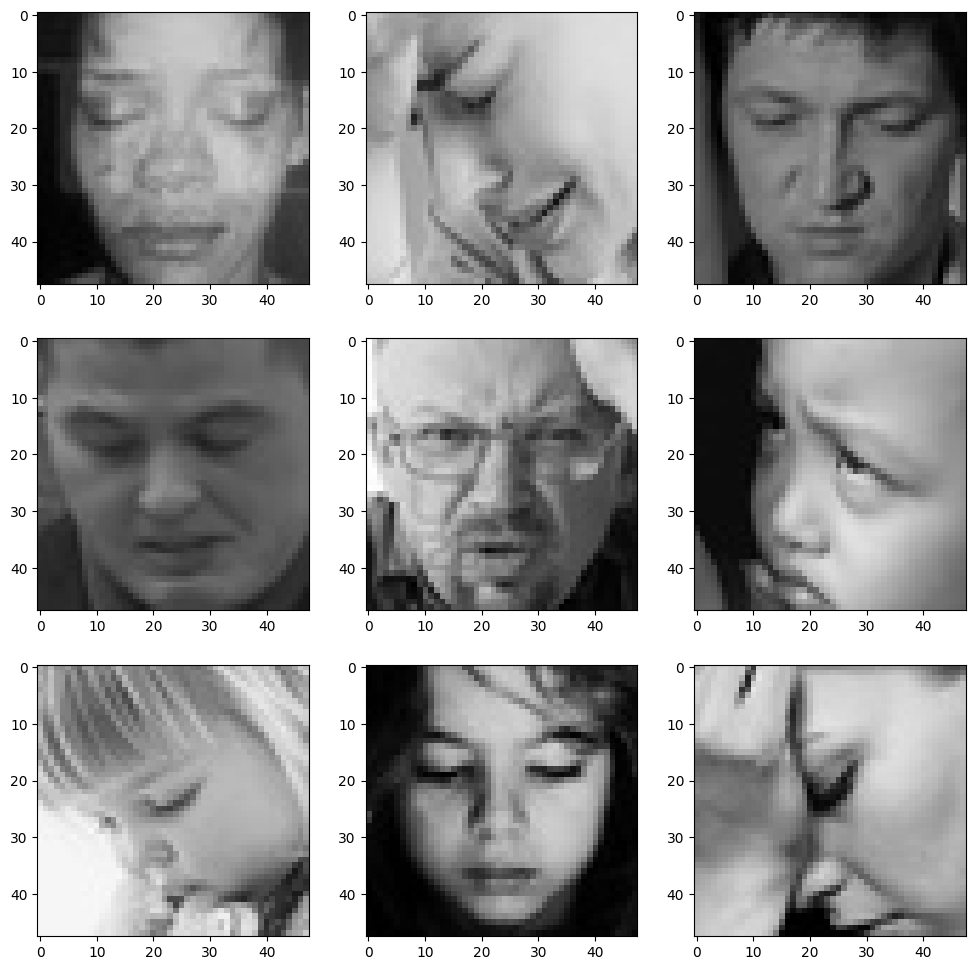

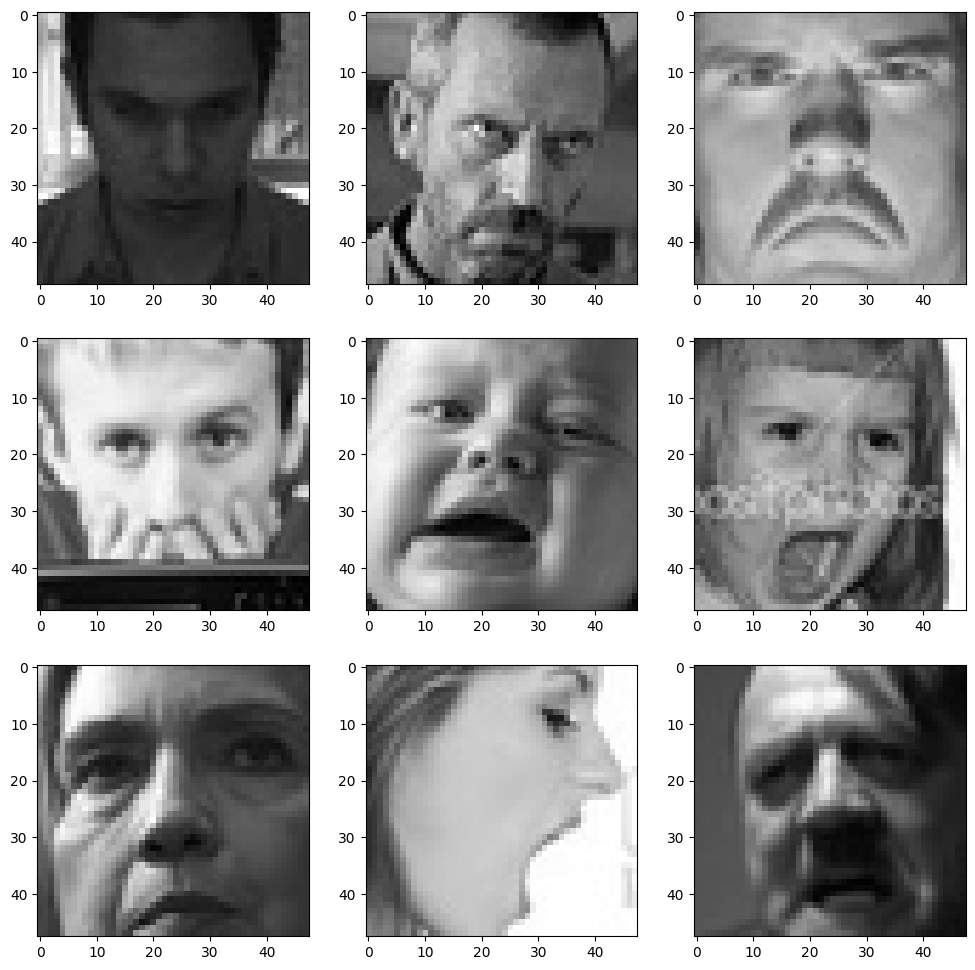

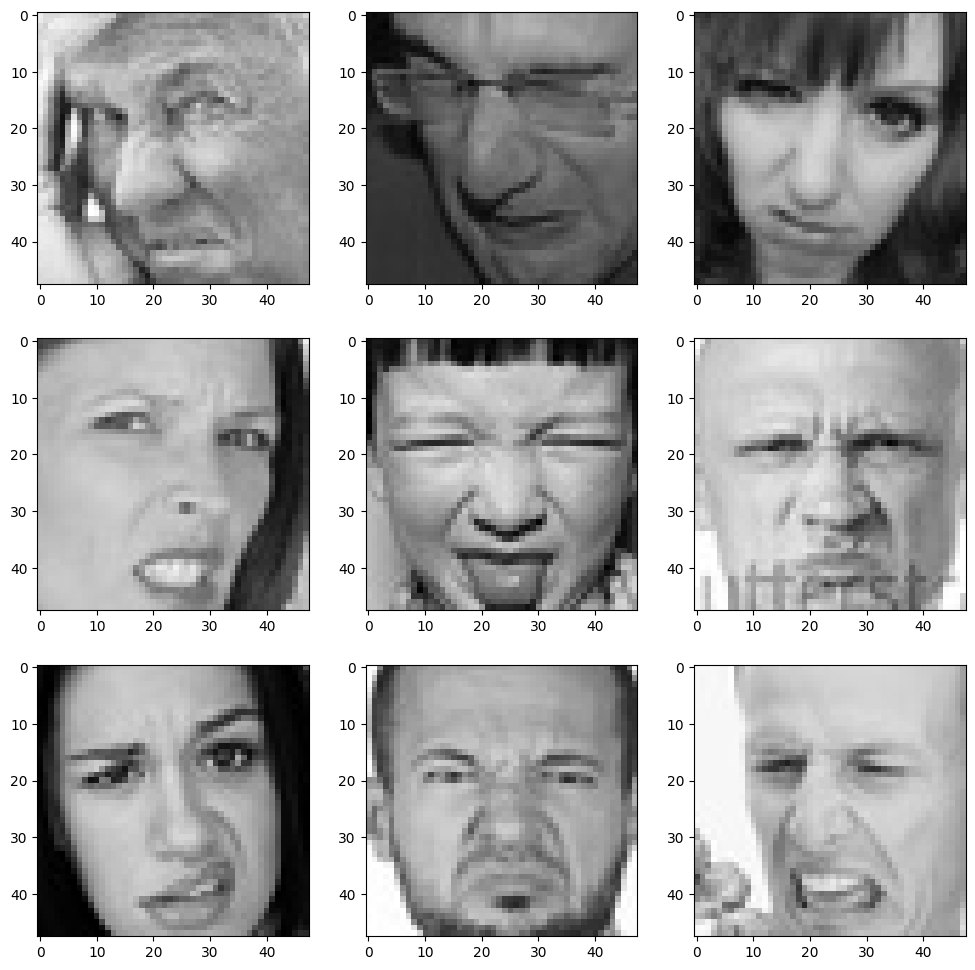

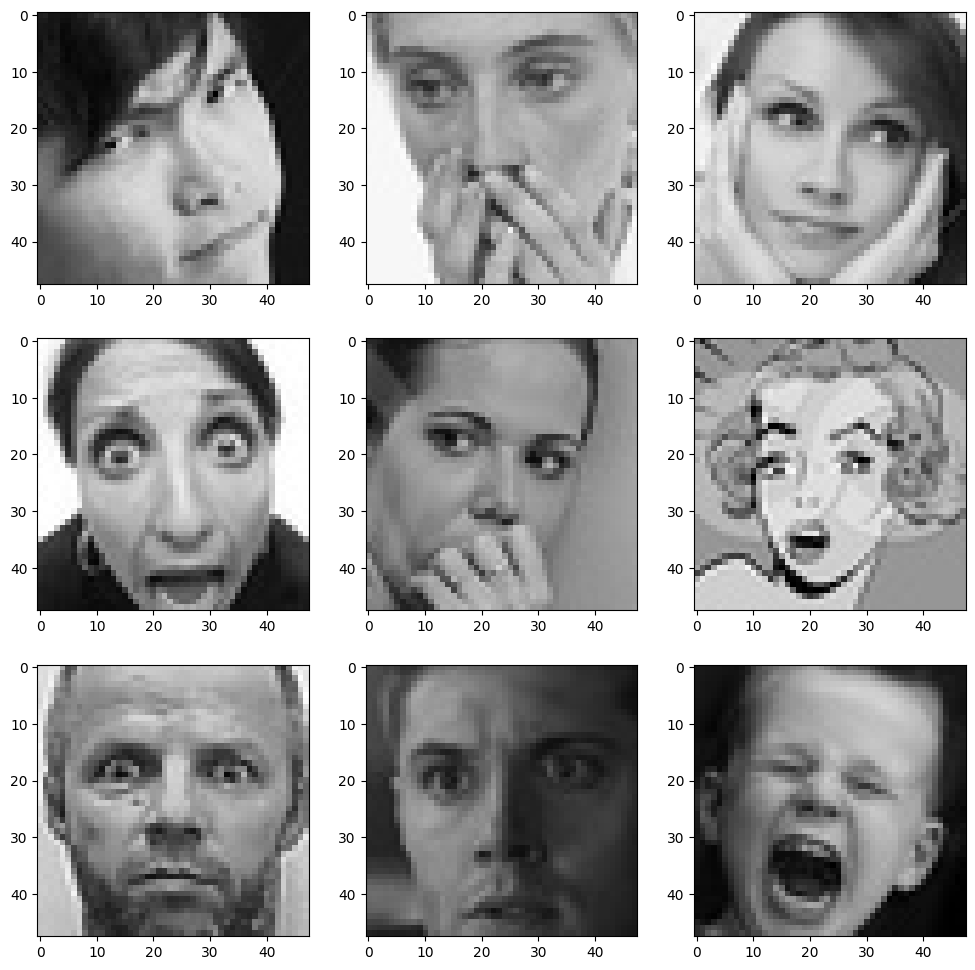

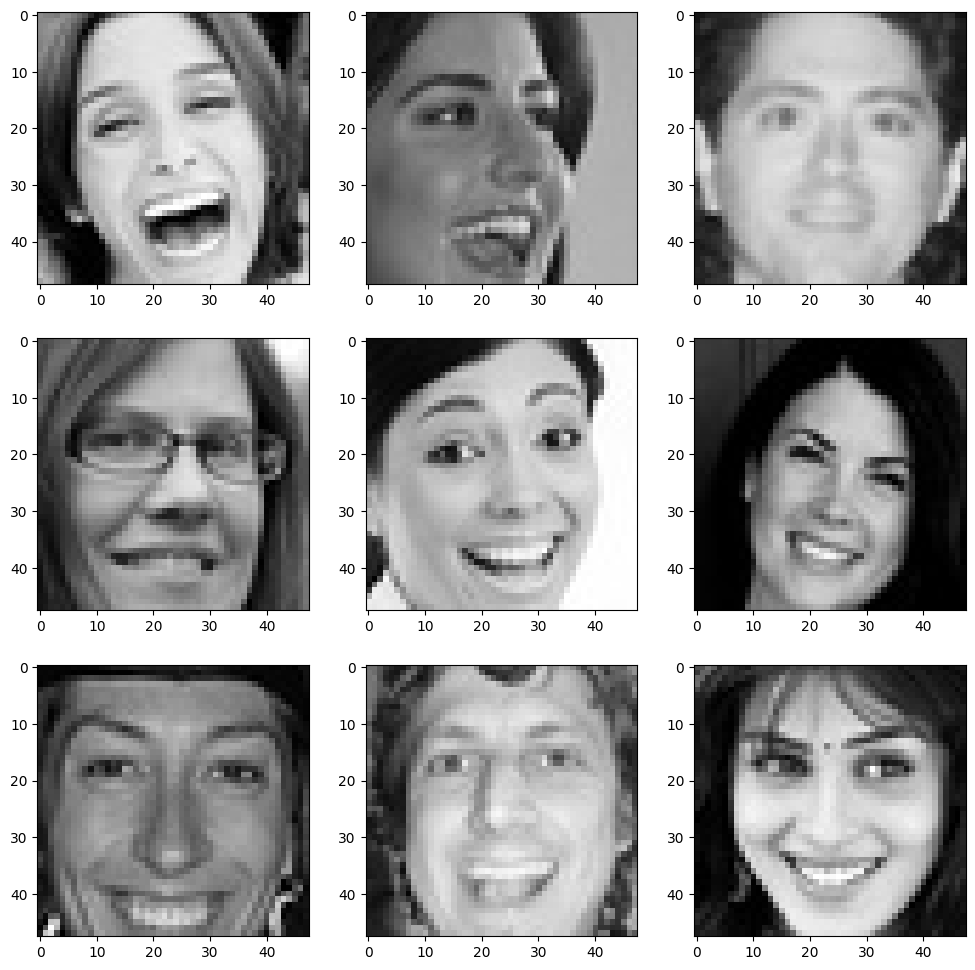

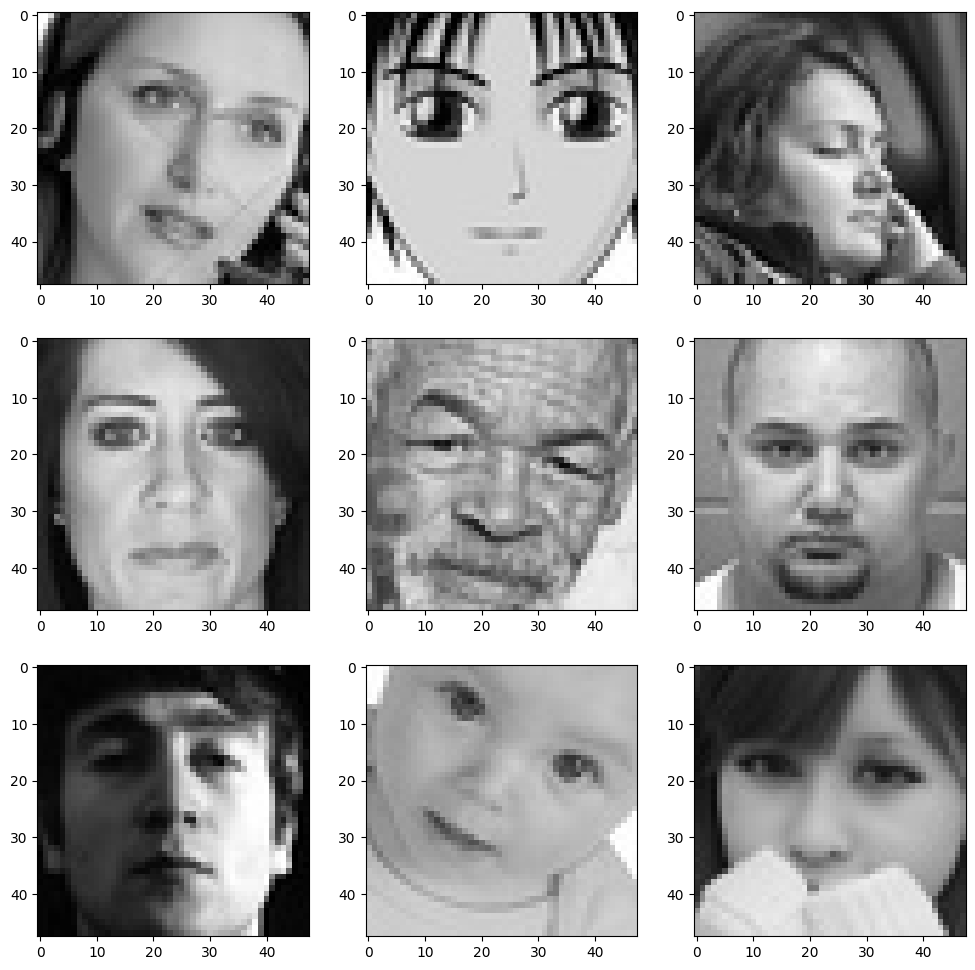

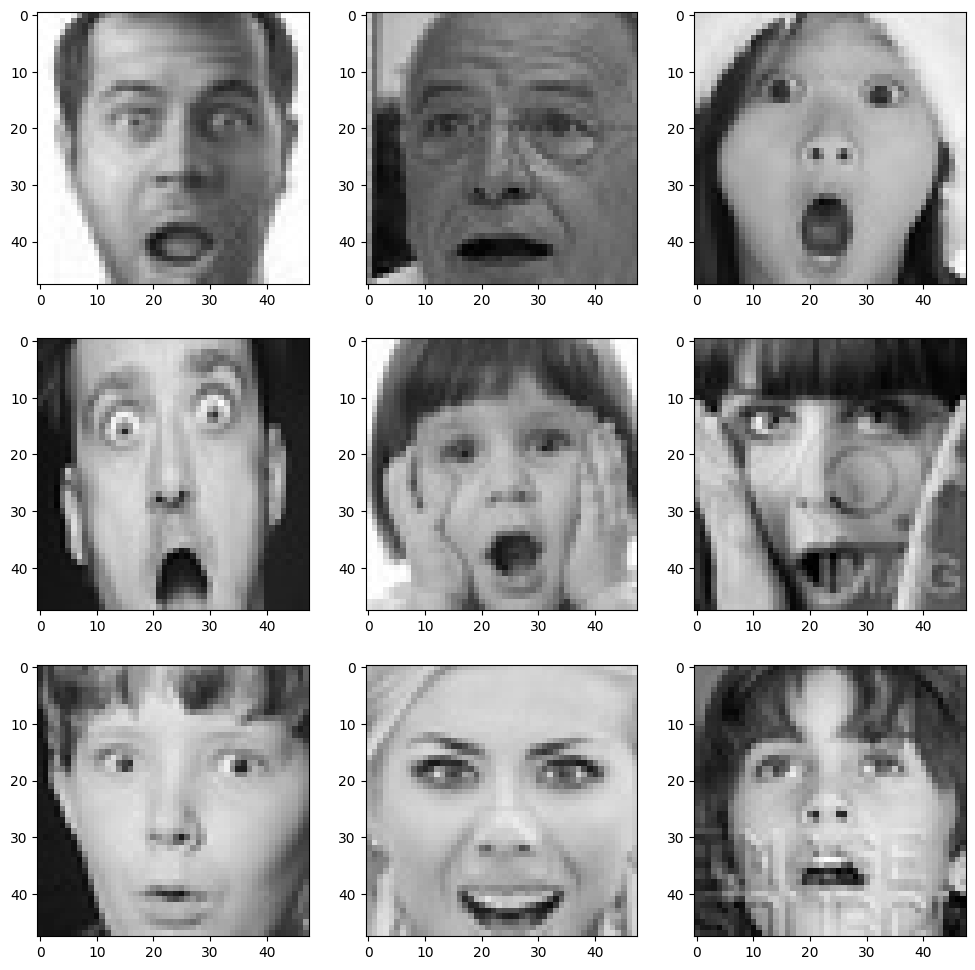

In [3]:
expression = ['sad','angry','disgust','fear','happy','neutral','surprise']
for j in range(0,len(expression)):
    plt.figure(figsize=(12,12))
    for i in range(1, 10, 1):
        plt.subplot(3, 3, i)
        img = load_img(folder_path+"train/"+expression[j]+"/"+os.listdir(folder_path + "train/" + expression[j])[i], target_size=(picture_size, picture_size))
        plt.imshow(img)   
    plt.show()

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [6]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import tensorflow as tf  

epochs = 20

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=tf.keras.optimizers.Adam(3e-4),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy(name="acc")],
)

folder_path = '/kaggle/input/face-expression-recognition-dataset/images/'
picture_size = 48
batch_size = 32

train_set = tf.keras.utils.image_dataset_from_directory(
    directory=folder_path + "train",
    labels='inferred',
    label_mode='categorical', 
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(48, 48),
    shuffle=True,
    seed=123, 
)

val_set = tf.keras.utils.image_dataset_from_directory(
    directory=folder_path + "validation",  
    labels='inferred',
    label_mode='categorical',  
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(48, 48),
    shuffle=True,
    seed=123,
)

model.fit(
    train_set,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_set,
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


901/901 [==============================] - 675s 745ms/step - loss: 0.3961 - acc: 0.8525 - val_loss: 0.3350 - val_acc: 0.8647
Epoch 2/20
901/901 [==============================] - 673s 747ms/step - loss: 0.3274 - acc: 0.8692 - val_loss: 0.2901 - val_acc: 0.8844
Epoch 3/20
901/901 [==============================] - 666s 740ms/step - loss: 0.3006 - acc: 0.8782 - val_loss: 0.2844 - val_acc: 0.8880
Epoch 4/20
901/901 [==============================] - 668s 741ms/step - loss: 0.2837 - acc: 0.8833 - val_loss: 0.2781 - val_acc: 0.8848
Epoch 5/20
901/901 [==============================] - 668s 741ms/step - loss: 0.2723 - acc: 0.8875 - val_loss: 0.2842 - val_acc: 0.8868
Epoch 6/20
901/901 [==============================] - 668s 742ms/step - loss: 0.2624 - acc: 0.8912 - val_loss: 0.2561 - val_acc: 0.8953
Epoch 7/20
901/901 [==============================] - 662s 734ms/step - loss: 0.2550 - acc: 0.8941 - val_loss: 0.2603 - val_acc: 0.8935
Epoch 8/20
901/901 [==============================] - 661s 

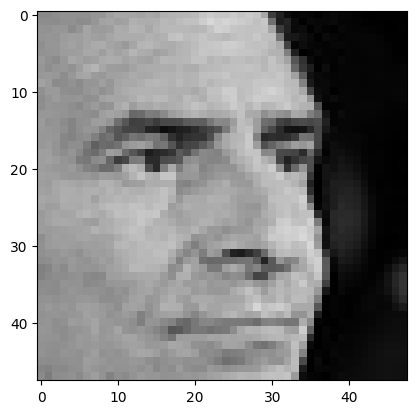

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

image_size = (48, 48)
img = image.load_img("/kaggle/input/face-expression-recognition-dataset/images/train/sad/10006.jpg", target_size=image_size)
plt.imshow(img)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)




print()